# Conversion Funnel Analysis

**Conversion Funnel menggambarkan tahapan yang dialami oleh seorang pelanggan dalam proses pemasaran, mulai dari saat mereka pertama kali dihubungi hingga akhirnya mereka memutuskan untuk berlangganan produk.**

Pada proyek analisis ini, saya bertujuan ntuk melakukan analisis terhadap kampanye pemasaran langsung yang dilakukan oleh sebuah institusi perbankan di Portugal. Kampanye ini berbasis pada panggilan telepon ke nasabah dengan tujuan untuk menawarkan produk deposito bank. Dalam beberapa kasus, lebih dari satu kali kontak dilakukan dengan nasabah yang sama untuk mengetahui apakah mereka akan berlangganan produk deposito tersebut ('yes') atau tidak ('no').

Dataset ini juga dilengkapi dengan tambahan lima fitur sosial dan ekonomi yang diperoleh dari indikator nasional yang dikeluarkan oleh Banco de Portugal. Fitur-fitur ini memberikan konteks lebih lanjut mengenai keadaan sosial dan ekonomi yang dapat memengaruhi respons pelanggan terhadap kampanye pemasaran.

# Data Cleaning dan Data Preprocessing

## Import Library dan pemeriksaan data awal

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# Membaca dataset
data = pd.read_csv(r"C:\Users\LUFFI IDRIS SETIAWAN\Desktop\Data Science Project\Data Analyst Project\Dataset\bank-additional-full.csv", sep =';')

# Melihat 5 baris pertama dari dataset
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Memeriksa informasi kolom dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Memeriksa statistik dasar untuk semua kolom numerik
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Mengecek nilai yang hilang (missing values)
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Dataset tidak memiliki data missing, tetapi terdapat nilai "Unknown" yang perlu ditangani pada beberapa kolom**

In [11]:
# Mengganti nilai 'unknown' dengan NaN pada kolom yang relevan
columns_with_unknowns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
data[columns_with_unknowns] = data[columns_with_unknowns].replace('unknown', pd.NA)

# Memeriksa apakah ada nilai NaN setelah penggantian
print(data.isnull().sum())


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


**Kolom job, marital, education, default, housing, dan loan memiliki nilai 'unknown' yang dapat diartikan sebagai nilai yang hilang atau tidak terdefinisi. Saya akan merubah nilai tersebut dengan modus (nilai paling sering muncul) dari setiap kolom itu agar menjadi lebih representatif.**

In [13]:
# Mengisi missing values pada kolom kategori dengan modus
for column in columns_with_unknowns:
    mode_value = data[column].mode()[0] 
    data[column] = data[column].fillna(mode_value)

# Memeriksa apakah ada nilai NaN yang tersisa
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [14]:
# Mengonversi kolom 'default', 'housing', dan 'loan' menjadi nilai numerik
def convert_to_numeric(col):
    col = col.replace({'yes': 1, 'no': 0})
    return col

# Terapkan konversi pada kolom yang relevan
data['default'] = convert_to_numeric(data['default'])
data['housing'] = convert_to_numeric(data['housing'])
data['loan'] = convert_to_numeric(data['loan'])
data['y'] = convert_to_numeric(data['y'])

# Cek hasilnya
data[['default', 'housing', 'loan', 'y']].head()

,default,housing,loan,y
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,1,0


In [15]:
# Mengecek jumlah duplikasi
data.duplicated().sum()

14

In [16]:
# Menghapus duplikasi
data.drop_duplicates(inplace=True)

data.duplicated().sum()

0

In [17]:
from scipy.stats import zscore

numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                     'euribor3m', 'nr.employed']

# Menghitung Z-Score untuk kolom numerik
z_scores = data[numerical_columns].apply(zscore)

# Menampilkan Z-Score lebih dari 3 atau kurang dari -3
outliers = (z_scores > 3) | (z_scores < -3)
outlier_data = data[outliers.any(axis=1)]

print(f"Jumlah baris yang memiliki outliers: {outlier_data.shape[0]}")


Jumlah baris yang memiliki outliers: 3874


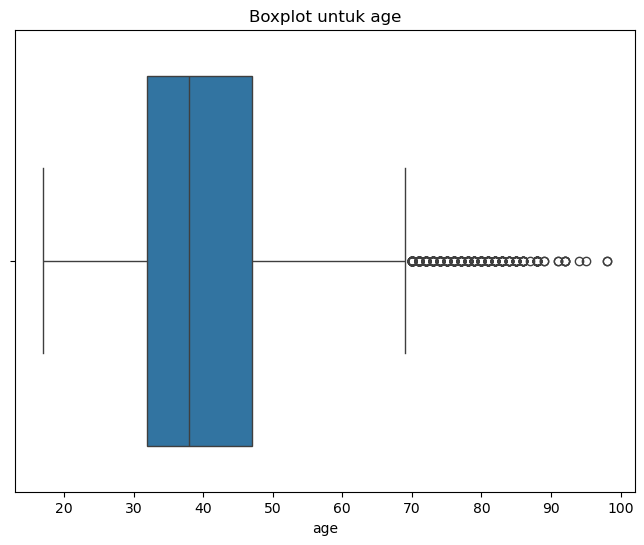

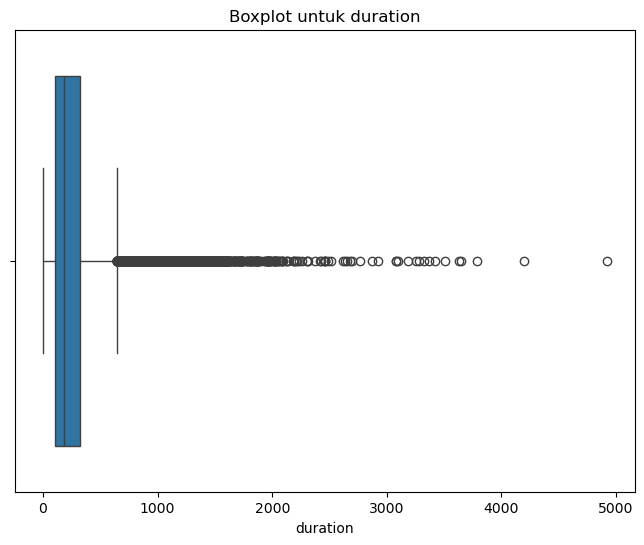

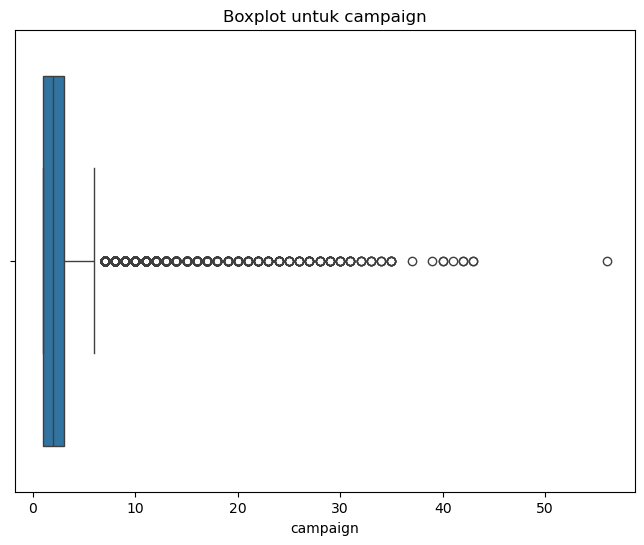

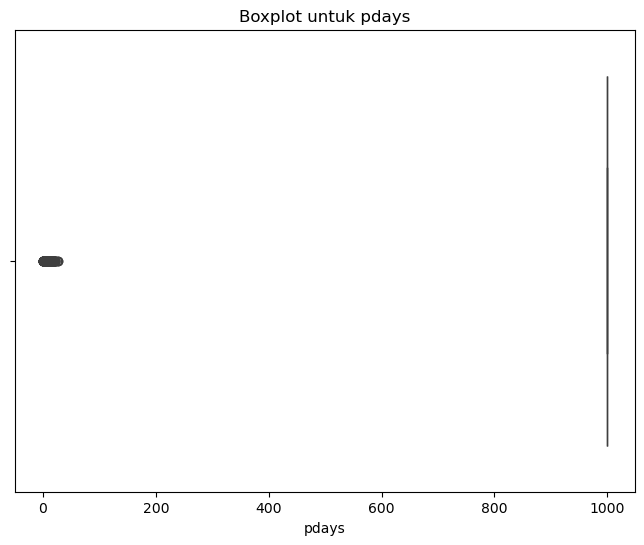

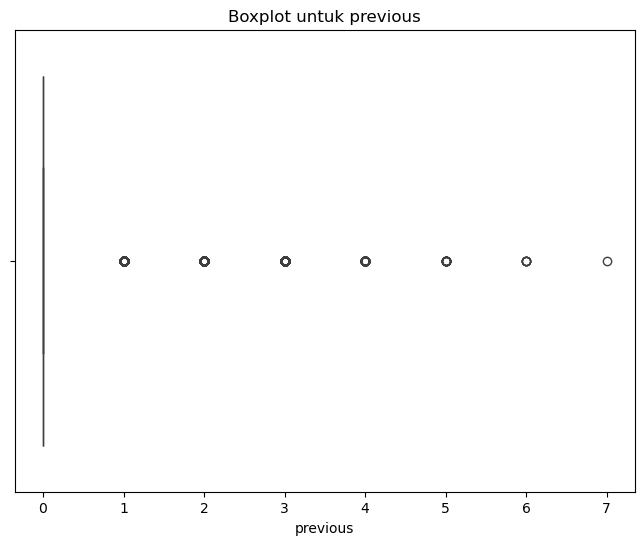

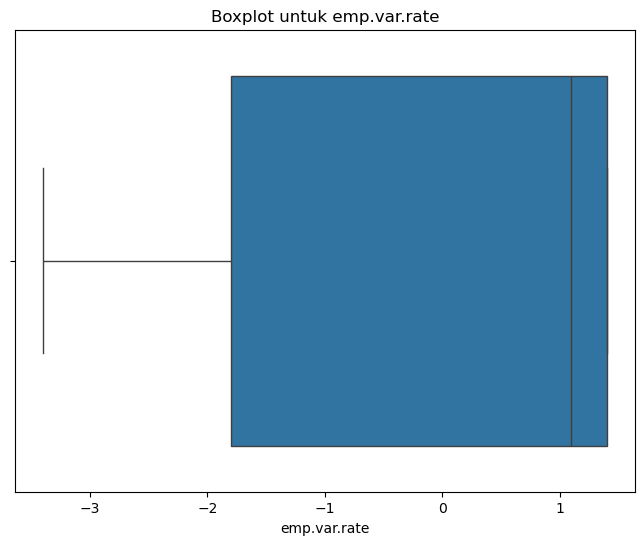

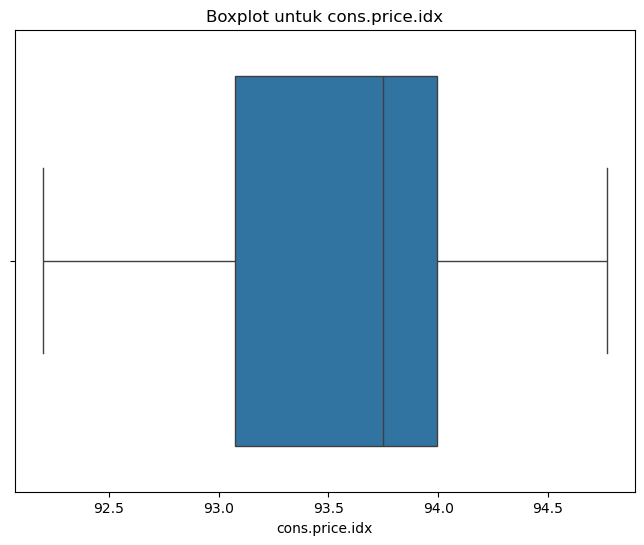

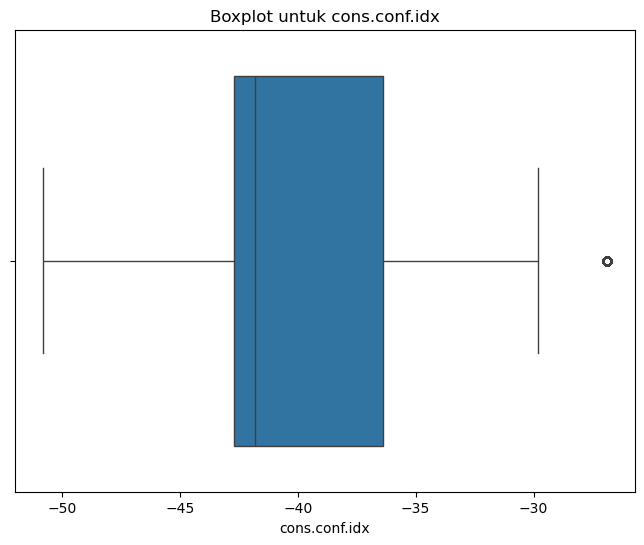

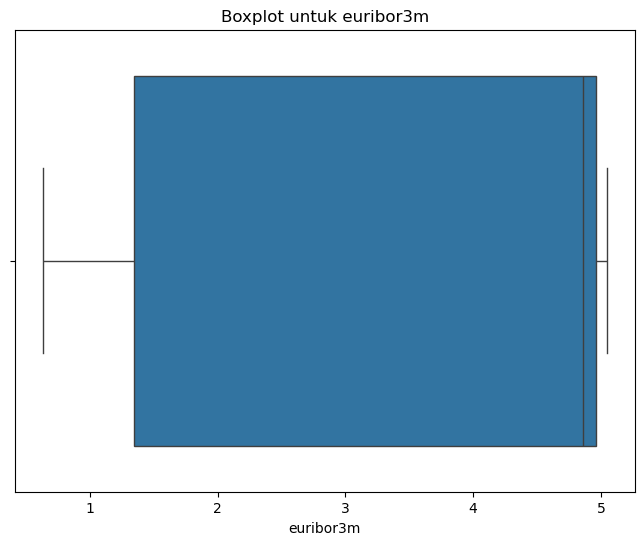

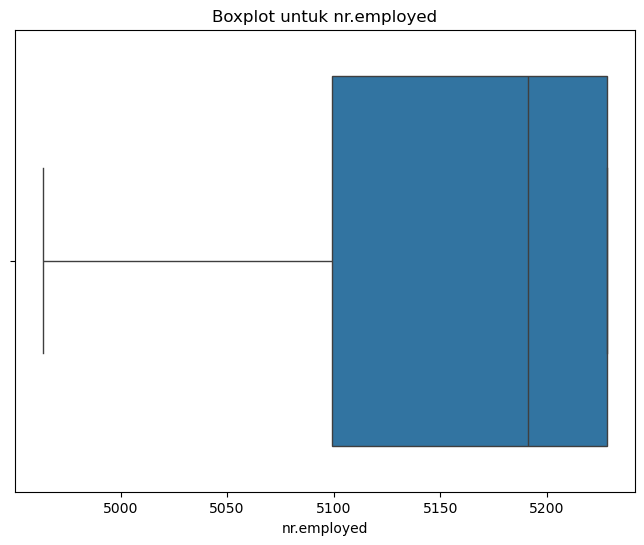

In [18]:
# Membuat boxplot untuk masing-masing kolom numerik
for col in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot untuk {col}')
    plt.show()

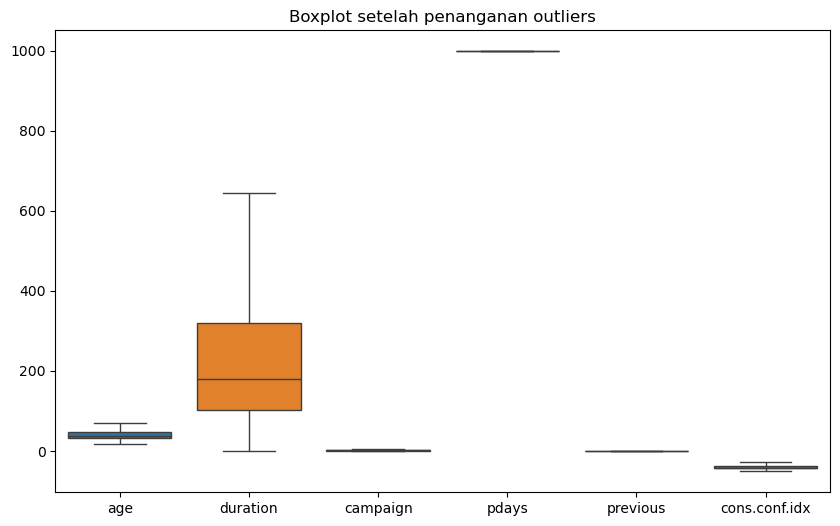

In [19]:
# Deteksi dan mengatasi outliers dengan IQR
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Kolom yang terdeteksi memiliki outliers
outlier_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']

# Mengatasi outliers untuk setiap kolom
for col in outlier_columns:
    handle_outliers(data, col)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[outlier_columns])
plt.title("Boxplot setelah penanganan outliers")
plt.show()

# Exploratory Data Analysis

Conversion funnel terbagi menjadi beberapa tahap seperti:
1. **Awareness**

   Tahap di mana pelanggan pertama kali mengetahui tentang produk atau layanan. Dalam konteks kasus ini, kita bisa melihat variabel-variabel seperti jenis pekerjaan (job), pendidikan (education), status pernikahan (marital), dan informasi terkait klien yang menggambarkan potensi mereka untuk mendengar tentang kampanye ini.

2. **Interest**

   Pada tahap ini, pelanggan mulai tertarik dengan penawaran. Bisa dilihat dari seberapa sering mereka dihubungi dalam kampanye, yang dapat kita ukur dengan variabel-variabel seperti contact, month, dan duration (durasi panggilan). Lama panggilan bisa memberi indikasi seberapa besar ketertarikan klien terhadap kampanye.

3. **Desire**

   Pelanggan memiliki keinginan untuk berlangganan produk setelah dipengaruhi oleh berbagai faktor. Faktor-faktor yang mendorong pelanggan untuk memiliki keinginan berlangganan. 

5. **Action (Conversion)**

   Ini adalah tahap di mana pelanggan melakukan tindakan (misalnya, berlangganan produk). Kolom target y akan menjadi fokus utama di sini untuk melihat apakah pelanggan akhirnya berkonversi menjadi pelanggan yang membeli produk.

5. **Re-engagement**

   yaitu tahap di mana pelanggan yang sebelumnya tidak berhasil dikonversi dihubungi kembali untuk mencoba menarik minat mereka.

## Awareness

Pada tahap Awareness, saya ingin menganalisis faktor-faktor demografis klien yang dapat memengaruhi keputusan mereka untuk berlangganan produk. Faktor-faktor seperti pekerjaan, status pernikahan, pendidikan, dan usia dianalisis untuk mendapatkan wawasan tentang segmen pasar yang potensial.

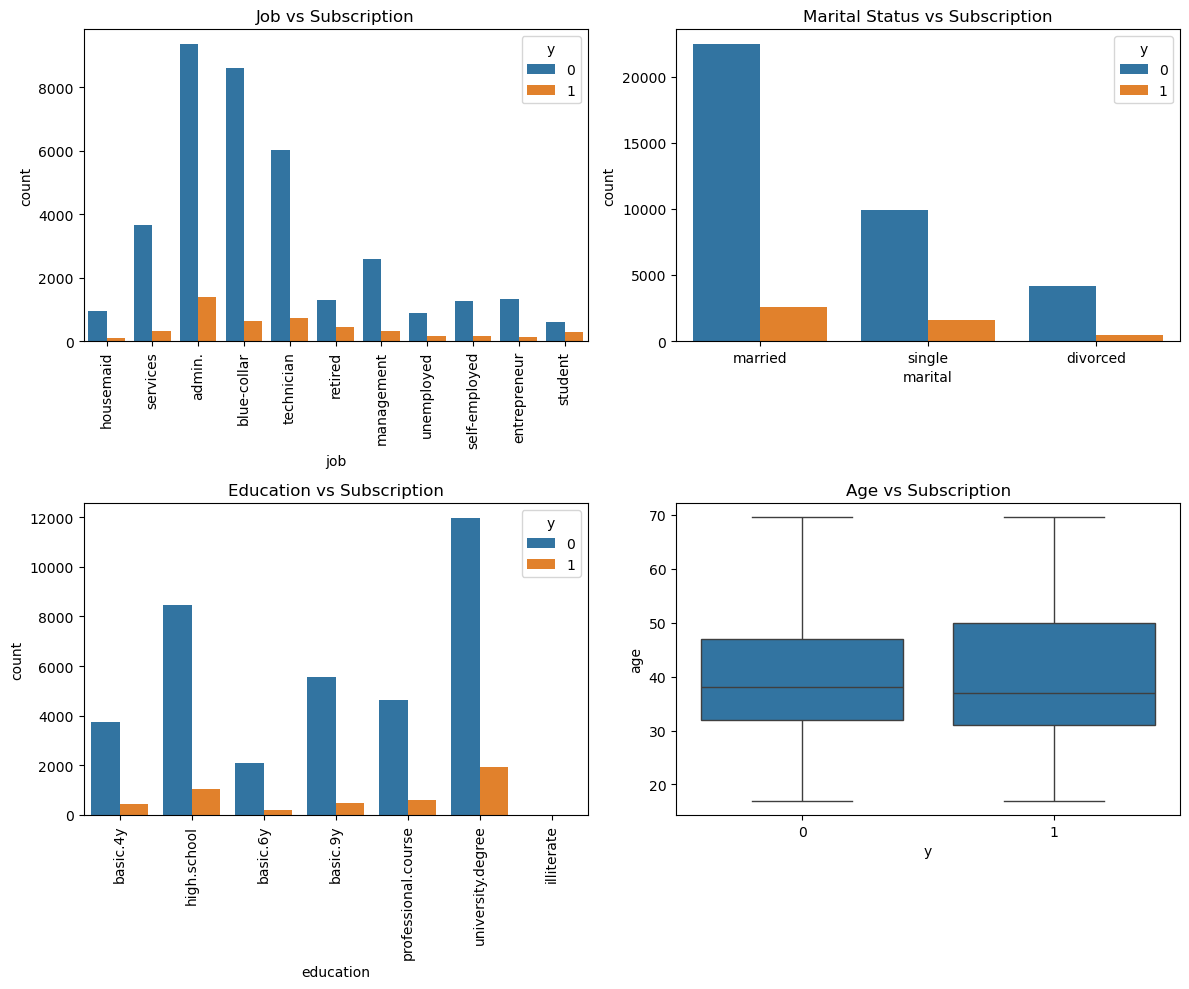

In [24]:
# Visualisasi pengaruh faktor demografi terhadap target 'y'
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pekerjaan (job) vs target
sns.countplot(data=data, x='job', hue='y', ax=axes[0, 0])
axes[0, 0].set_title('Job vs Subscription')
axes[0, 0].tick_params(axis='x', rotation=90)

# Status pernikahan (marital) vs target
sns.countplot(data=data, x='marital', hue='y', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status vs Subscription')

# Pendidikan (education) vs target
sns.countplot(data=data, x='education', hue='y', ax=axes[1, 0])
axes[1, 0].set_title('Education vs Subscription')
axes[1, 0].tick_params(axis='x', rotation=90)

# Usia (age) vs target
sns.boxplot(data=data, x='y', y='age', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Subscription')

plt.tight_layout()
plt.show()


In [25]:
# Konversi untuk setiap kategori
awareness_columns = ['job', 'marital', 'education']

for column in awareness_columns:
    conversion_rate = data.groupby(column)['y'].mean().sort_values(ascending=False) * 100
    print(f"\nTingkat Konversi Berdasarkan {column.capitalize()}:\n")
    print(conversion_rate)



Tingkat Konversi Berdasarkan Job:

job
student          31.428571
retired          25.261932
unemployed       14.201183
admin.           12.914031
management       11.217510
technician       10.832468
self-employed    10.485574
housemaid        10.000000
entrepreneur      8.516484
services          8.142173
blue-collar       6.895806
Name: y, dtype: float64

Tingkat Konversi Berdasarkan Marital:

marital
single      14.008993
divorced    10.323140
married     10.172407
Name: y, dtype: float64

Tingkat Konversi Berdasarkan Education:

education
illiterate             22.222222
university.degree      13.819909
professional.course    11.354962
high.school            10.838940
basic.4y               10.251497
basic.6y                8.206024
basic.9y                7.824648
Name: y, dtype: float64


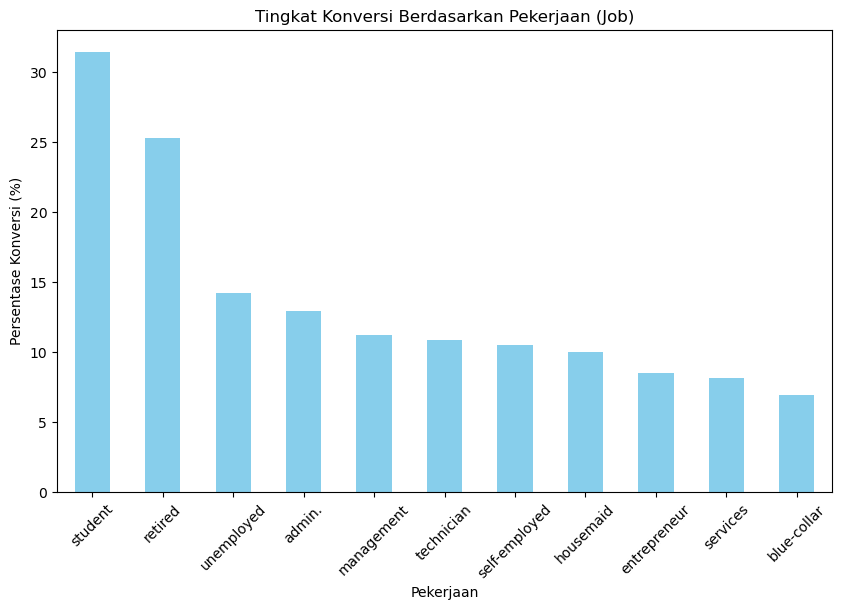

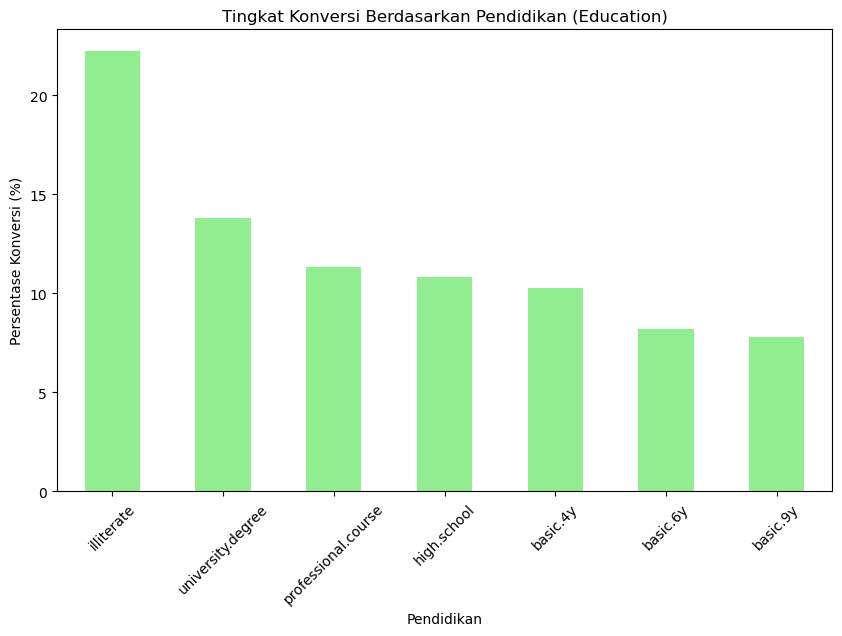

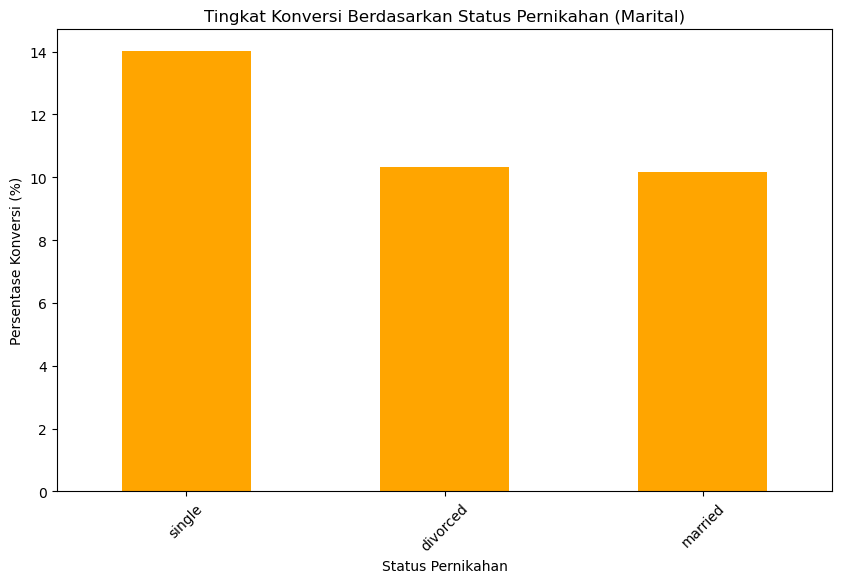

In [26]:
# Visualisasi proporsi konversi berdasarkan pekerjaan
conversion_job = data.groupby('job')['y'].mean().sort_values(ascending=False) * 100
conversion_job.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Tingkat Konversi Berdasarkan Pekerjaan (Job)')
plt.ylabel('Persentase Konversi (%)')
plt.xlabel('Pekerjaan')
plt.xticks(rotation=45)
plt.show()

# Visualisasi proporsi konversi berdasarkan pendidikan
conversion_education = data.groupby('education')['y'].mean().sort_values(ascending=False) * 100
conversion_education.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Tingkat Konversi Berdasarkan Pendidikan (Education)')
plt.ylabel('Persentase Konversi (%)')
plt.xlabel('Pendidikan')
plt.xticks(rotation=45)
plt.show()

# Visualisasi proporsi konversi berdasarkan status pernikahan
conversion_marital = data.groupby('marital')['y'].mean().sort_values(ascending=False) * 100
conversion_marital.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Tingkat Konversi Berdasarkan Status Pernikahan (Marital)')
plt.ylabel('Persentase Konversi (%)')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=45)
plt.show()


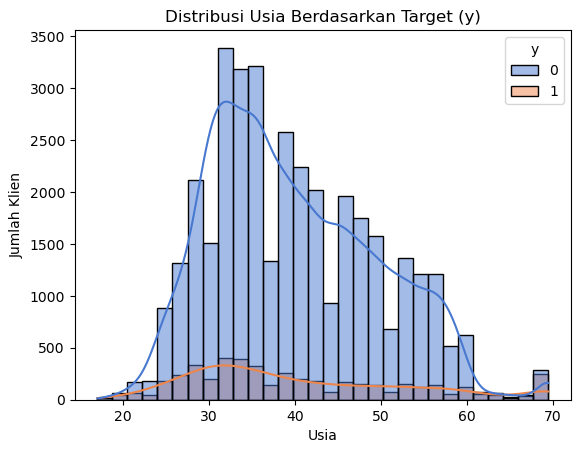

In [27]:
# Visualisasi distribusi usia berdasarkan target
sns.histplot(data=data, x='age', hue='y', kde=True, bins=30, palette='muted')
plt.title('Distribusi Usia Berdasarkan Target (y)')
plt.xlabel('Usia')
plt.ylabel('Jumlah Klien')
plt.show()


**Saya akan melakukan analisis lebih dalam dengan memeriksa tingkat konversi berdasarkan kombinasi pekerjaan (job) dan pendidikan (education). Hasilnya akan divisualisasikan menggunakan heatmap untuk mengidentifikasi kombinasi dengan tingkat konversi tinggi.**

### Kesimpulan untuk Tahap Awareness

1. Mahasiswa dan pensiunan adalah segmen dengan tingkat konversi tertinggi dengan masing-masing sebesar 31.4% dan 25.3%. **Strategi pemasaran dapat difokuskan terhadap mereka.**
2. Klien "illiterate" memiliki tingkat konversi tertinggi (22.2%), meskipun jumlahnya mungkin kecil. Pendidikan "university degree" juga menunjukkan tingkat konversi yang tinggi (13.8%). **Klien dengan pendidikan tinggi cenderung lebih responsif terhadap kampanye.**
3. Status "single" memiliki tingkat konversi tertinggi (14%), diikuti oleh "divorced" (10.3%) dan "married" (10.2%). **Klien dengan status "single" tampaknya lebih mudah untuk dikonversi, mungkin karena mereka memiliki lebih banyak kebebasan finansial.**
4. **Usia produktif (30-40 tahun) adalah kelompok utama, tetapi kelompok usia tua (pensiunan) juga sangat potensial.**

## Interest

Pada tahap ini, saya memiliki tujuan untuk menganalisis bagaimana durasi panggilan (duration) memengaruhi kemungkinan klien untuk berlangganan, seberapa sering klien dihubungi selama kampanye (campaign), dan bagaimana riwayat kontak sebelumnya (pdays, previous, dan poutcome) berperan dalam minat klien.

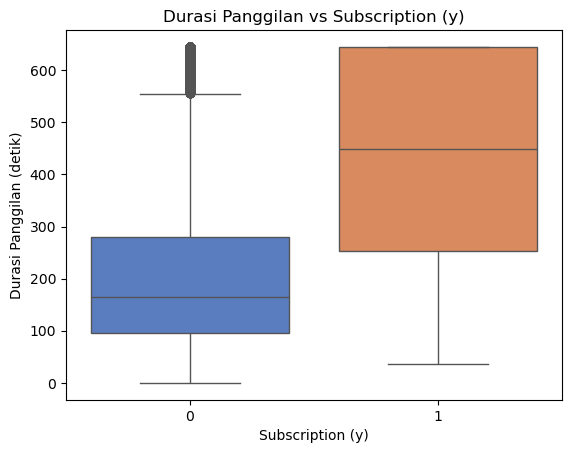

Statistik Deskriptif Durasi Panggilan Berdasarkan Target:
      count        mean         std   min    25%    50%    75%    max
y                                                                   
0  36535.0  209.665321  158.262722   0.0   95.0  164.0  279.0  644.5
1   4639.0  434.774951  192.352143  37.0  253.5  449.0  644.5  644.5


In [32]:
# Visualisasi distribusi durasi panggilan berdasarkan target
sns.boxplot(data=data, x='y', y='duration', palette='muted')
plt.title('Durasi Panggilan vs Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Durasi Panggilan (detik)')
plt.show()

# Statistik deskriptif untuk durasi panggilan
duration_stats = data.groupby('y')['duration'].describe()
print("Statistik Deskriptif Durasi Panggilan Berdasarkan Target:\n", duration_stats)

**Klien yang berlangganan (y=1) cenderung memiliki durasi panggilan yang jauh lebih lama dibandingkan dengan yang tidak berlangganan (y=0). Panggilan yang memiliki durasi lebih lama memungkinkan lebih banyak informasi diberikan kepada klien, sehingga meningkatkan kemungkinan konversi.**

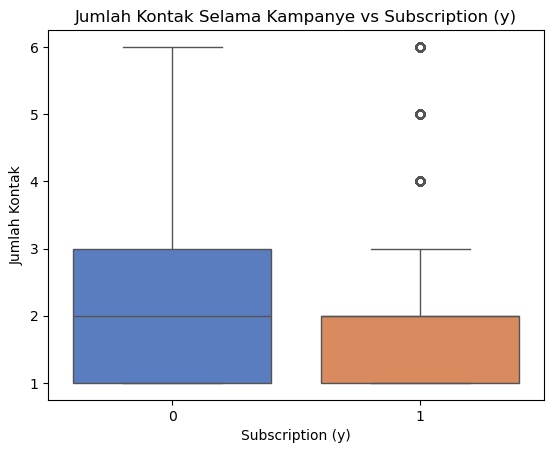

Statistik Deskriptif Jumlah Kontak Berdasarkan Target:
      count      mean       std  min  25%  50%  75%  max
y                                                      
0  36535.0  2.313891  1.574749  1.0  1.0  2.0  3.0  6.0
1   4639.0  1.973486  1.306908  1.0  1.0  2.0  2.0  6.0


In [34]:
# Visualisasi distribusi jumlah kontak berdasarkan target
sns.boxplot(data=data, x='y', y='campaign', palette='muted')
plt.title('Jumlah Kontak Selama Kampanye vs Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Jumlah Kontak')
plt.show()

# Statistik deskriptif untuk jumlah kontak
campaign_stats = data.groupby('y')['campaign'].describe()
print("Statistik Deskriptif Jumlah Kontak Berdasarkan Target:\n", campaign_stats)


**Klien yang tidak berlangganan (y=0) cenderung memiliki jumlah kontak yang lebih tinggi dibandingkan klien yang berlangganan (y=1). Jumlah kontak yang terlalu tinggi tidak selalu meningkatkan kemungkinan konversi, justru dapat menyebabkan kelelahan pada klien.**

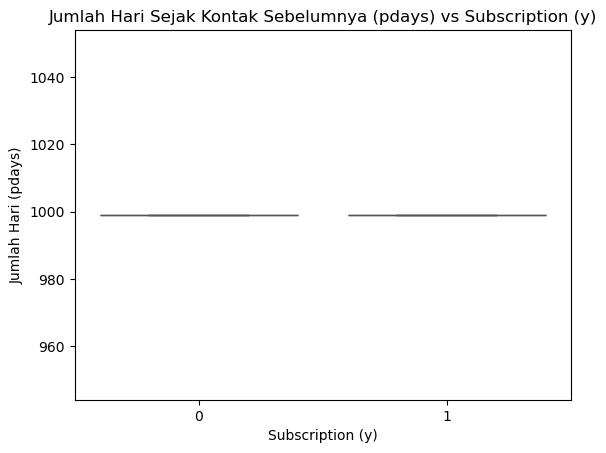

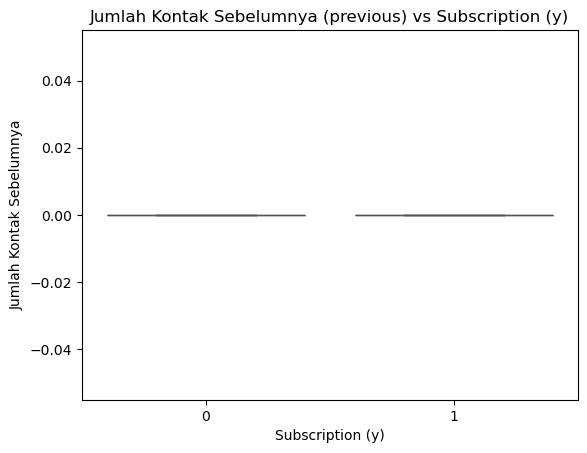

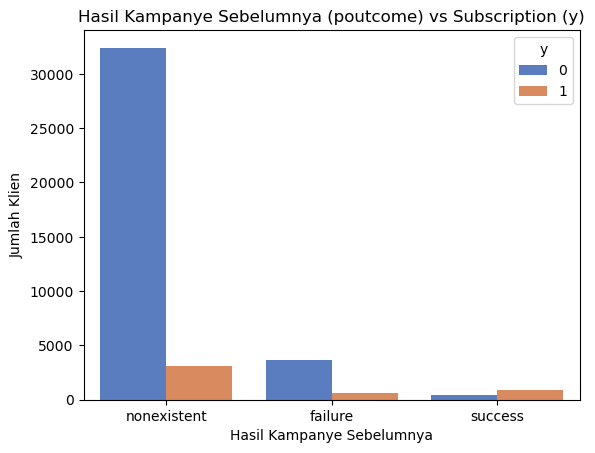

In [36]:
# Visualisasi distribusi pdays berdasarkan target
sns.boxplot(data=data, x='y', y='pdays', palette='muted')
plt.title('Jumlah Hari Sejak Kontak Sebelumnya (pdays) vs Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Jumlah Hari (pdays)')
plt.show()

# Visualisasi distribusi previous berdasarkan target
sns.boxplot(data=data, x='y', y='previous', palette='muted')
plt.title('Jumlah Kontak Sebelumnya (previous) vs Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Jumlah Kontak Sebelumnya')
plt.show()

# Visualisasi distribusi poutcome berdasarkan target
sns.countplot(data=data, x='poutcome', hue='y', palette='muted')
plt.title('Hasil Kampanye Sebelumnya (poutcome) vs Subscription (y)')
plt.xlabel('Hasil Kampanye Sebelumnya')
plt.ylabel('Jumlah Klien')
plt.show()


1. **Distribusi pdays terlihat tidak menunjukkan perbedaan signifikan antara klien yang berlangganan (y=1) dan yang tidak (y=0).** Nilai pdays memiliki rentang yang sangat kecil, hampir mendekati konstan untuk semua klien. Kolom pdays mungkin tidak terlalu relevan dalam menentukan konversi, atau data ini membutuhkan eksplorasi lebih lanjut untuk memahami pola yang mendasarinya.
   
2. **Distribusi previous hampir tidak menunjukkan variasi yang signifikan antara klien yang berlangganan dan yang tidak.** Bagi saya, hal ini menunjukkan bahwa kolom previous tidak terlalu berpengaruh dalam menentukan konversi.

   
3. **Mayoritas klien berada dalam kategori nonexistent**, artinya mereka belum pernah dihubungi dalam kampanye sebelumnya, **tetapi klien dengan hasil kampanye sebelumnya success memiliki proporsi konversi yang jauh lebih tinggi dibandingkan kategori failure atau nonexistent**

### Kesimpulan untuk Tahap Interest

1. Durasi Panggilan (duration) adalah faktor yang paling signifikan dalam tahap ini. Klien dengan durasi panggilan yang lebih lama cenderung memiliki tingkat konversi yang lebih tinggi
2. Jumlah Kontak (campaign) menunjukkan bahwa terlalu sering menghubungi klien tidak efektif
3. Hasil Kampanye Sebelumnya (poutcome) adalah indikator penting untuk menentukan potensi konversi
4. pdays dan previous terlihat kurang relevan

Kesimpulan utama dari analisis ini adalah bahwa **durasi panggilan dan hasil kampanye sebelumnya merupakan indikator utama keberhasilan kampanye.** Dengan memprioritaskan klien yang memiliki potensi tinggi berdasarkan faktor ini, perusahaan dapat meningkatkan efisiensi sumber daya dan efektivitas pemasaran

## Desire

Pada tahap ini, saya fokus menganalisis faktor yang meningkatkan keterlibatan klien terhadap kampanye. Karena data tidak mencakup aspek emosional, saya menggunakan durasi panggilan sebagai indikator utama, dengan asumsi bahwa panggilan yang lebih lama mencerminkan minat yang lebih besar. Selain itu, kombinasi pekerjaan dan pendidikan juga dianalisis untuk menemukan segmen klien yang lebih responsif. Pendekatan ini membantu memahami keterlibatan sebagai dasar dari keinginan klien.

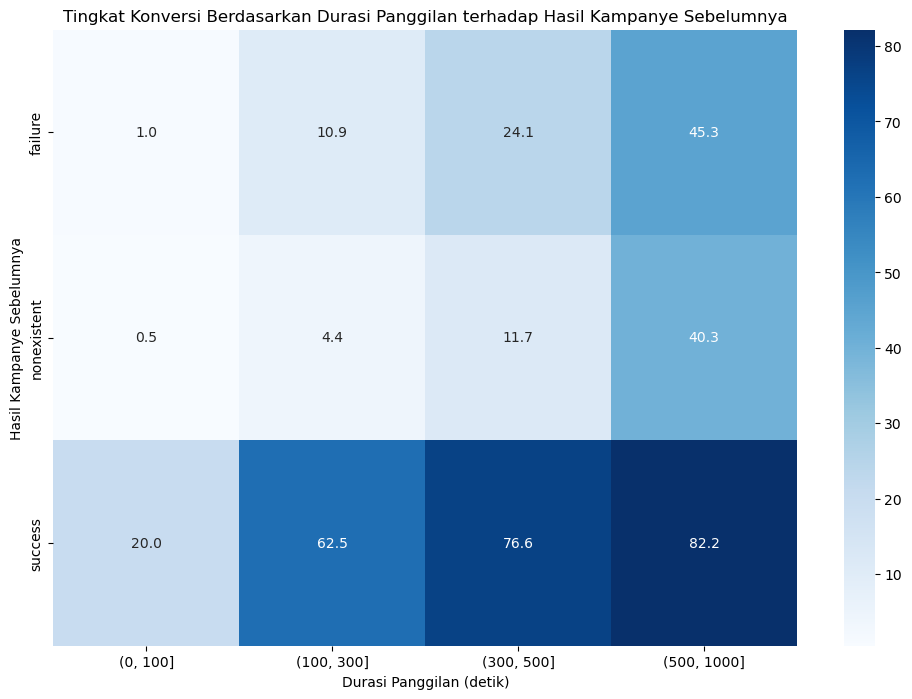

In [40]:
# Kombinasi durasi panggilan dan hasil kampanye sebelumnya
combination_table = data.groupby(['poutcome', pd.cut(data['duration'], bins=[0, 100, 300, 500, 1000])])['y'].mean().unstack() * 100

# Visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combination_table, annot=True, fmt='.1f', cmap='Blues')
plt.title('Tingkat Konversi Berdasarkan Durasi Panggilan terhadap Hasil Kampanye Sebelumnya')
plt.xlabel('Durasi Panggilan (detik)')
plt.ylabel('Hasil Kampanye Sebelumnya')
plt.show()


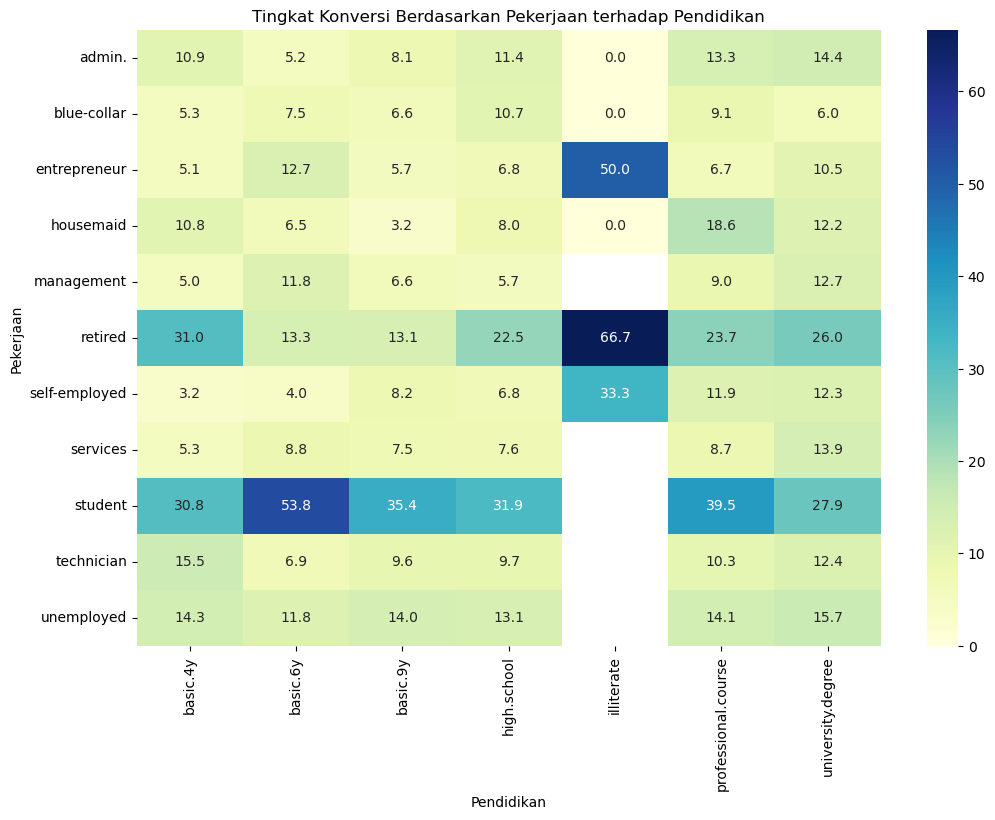

In [41]:
# Kombinasi pekerjaan dan pendidikan
job_education_table = data.groupby(['job', 'education'])['y'].mean().unstack() * 100

# Visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(job_education_table, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Tingkat Konversi Berdasarkan Pekerjaan terhadap Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Pekerjaan')
plt.show()


In [42]:
# Segmentasi berdasarkan pekerjaan, pendidikan, dan hasil kampanye sebelumnya
segment_table = data.groupby(['job', 'education', 'poutcome'])['y'].mean().sort_values(ascending=False) * 100
print(segment_table)


job           education    poutcome   
student       basic.4y     success        100.0
management    basic.6y     success        100.0
retired       illiterate   success        100.0
housemaid     high.school  success        100.0
              basic.6y     success        100.0
                                          ...  
entrepreneur  basic.6y     failure          0.0
              basic.4y     success          0.0
admin.        illiterate   nonexistent      0.0
blue-collar   illiterate   nonexistent      0.0
housemaid     basic.6y     failure          0.0
Name: y, Length: 202, dtype: float64


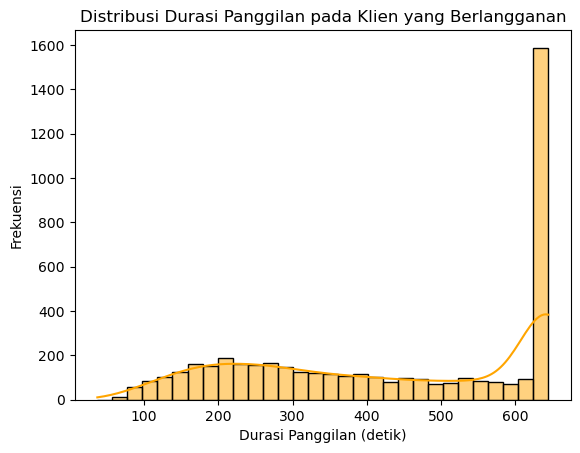

In [43]:
# Distribusi durasi panggilan untuk pelanggan yang berlangganan
sns.histplot(data=data[data['y'] == 1], x='duration', kde=True, bins=30, color='orange')
plt.title('Distribusi Durasi Panggilan pada Klien yang Berlangganan')
plt.xlabel('Durasi Panggilan (detik)')
plt.ylabel('Frekuensi')
plt.show()


### Insight yang saya dapatkan

1. **Klien dengan durasi panggilan lebih lama (terutama di atas 500 detik) memiliki frekuensi tinggi untuk berlangganan.** Hal ini menjadi indikator yang sangat penting dalam memengaruhi keinginan klien untuk berlangganan.
   
2. Klien dengan pekerjaan student dan pendidikan high school atau illiterate memiliki tingkat konversi tertinggi, tetapi Klien dengan pekerjaan retired dan pendidikan illiterate juga memiliki tingkat konversi yang luar biasa (66.7%). **Klien mahasiswa dan pensiunan dengan pendidikan rendah atau menengah, cenderung memiliki keinginan lebih tinggi untuk berlangganan.**

3. Hasil kampanye sebelumnya **"success" dikombinasikan dengan durasi panggilan panjang (>500 detik) memiliki tingkat konversi tertinggi (82.2%).** Sebaliknya, klien dengan hasil kampanye sebelumnya **"failure" dan durasi singkat (<300 detik) memiliki tingkat konversi rendah.**

### Strategi yang saya dapatkan

1. Prioritaskan klien "nonexistent" sebagai target utama karena mereka adalah pelanggan baru yang menjadi inti dari kampanye untuk memperluas basis pelanggan.
2. Klien "failure" tetap bisa menjadi target sekunder. Mereka mungkin gagal dikonversi di masa lalu karena faktor waktu, informasi produk yang kurang jelas, atau penawaran yang kurang menarik.
3. Klien "success" yang memiliki tingkat konversi tertinggi lebih relevan untuk strategi retensi pelanggan. Klien ini sudah memiliki engagement positif sebelumnya, sehingga kemungkinkan lebih mudah diyakinkan untuk kembali berlangganan. 


## Action

Pada tahap ini, saya menganalisis faktor-faktor yang memengaruhi keputusan pelanggan untuk berlangganan produk deposito bank. Fokus utamanya adalah memahami tingkat konversi keseluruhan (y) dan menentukan faktor-faktor yang memiliki pengaruh paling besar terhadap keputusan pelanggan.



Distribusi Target (y):
y
0    88.733181
1    11.266819
Name: proportion, dtype: float64


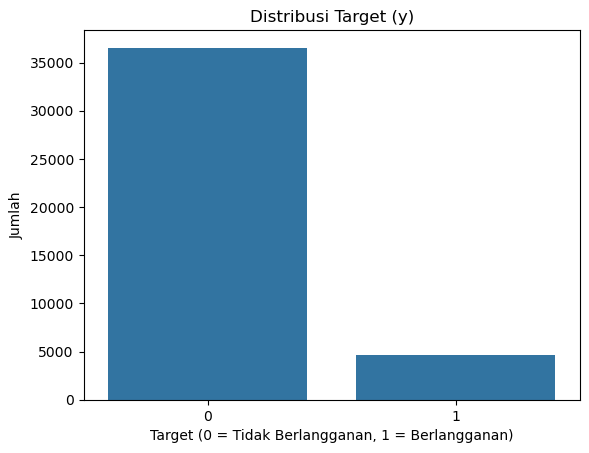

In [47]:
# Distribusi target (y)
target_distribution = data['y'].value_counts(normalize=True) * 100
print("Distribusi Target (y):")
print(target_distribution)

# Visualisasi distribusi target
sns.countplot(data=data, x='y')
plt.title('Distribusi Target (y)')
plt.xlabel('Target (0 = Tidak Berlangganan, 1 = Berlangganan)')
plt.ylabel('Jumlah')
plt.show()


**Sebanyak 11.27% dari total pelanggan berhasil berlangganan (y=1), sedangkan sisanya 88.73% tidak berlangganan (y=0).**

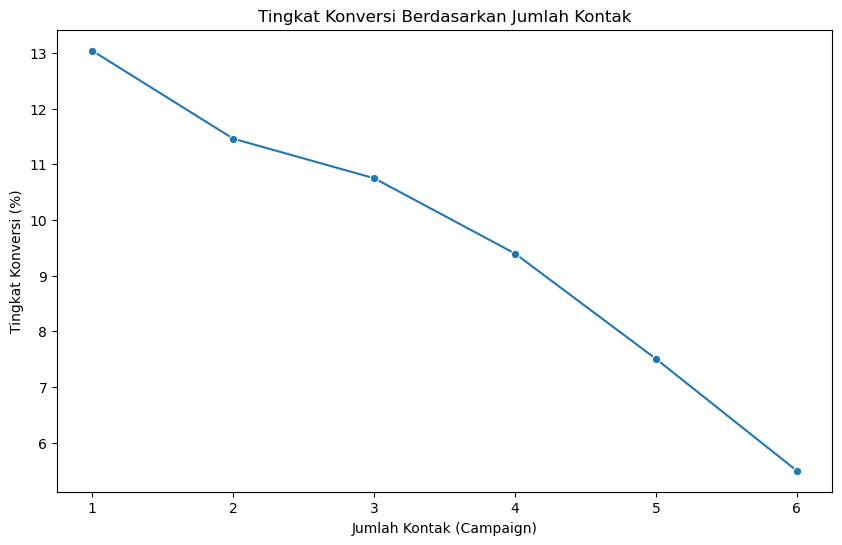

In [49]:
# Analisis tingkat konversi berdasarkan jumlah kontak
campaign_conversion = data.groupby('campaign')['y'].mean() * 100

# Visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(x=campaign_conversion.index, y=campaign_conversion.values, marker='o')
plt.title('Tingkat Konversi Berdasarkan Jumlah Kontak')
plt.xlabel('Jumlah Kontak (Campaign)')
plt.ylabel('Tingkat Konversi (%)')
plt.show()


**Tingkat konversi tertinggi terjadi saat pelanggan hanya dihubungi 1 kali, yaitu sekitar 13%. Semakin sering pelanggan dihubungi, tingkat konversi cenderung menurun.**

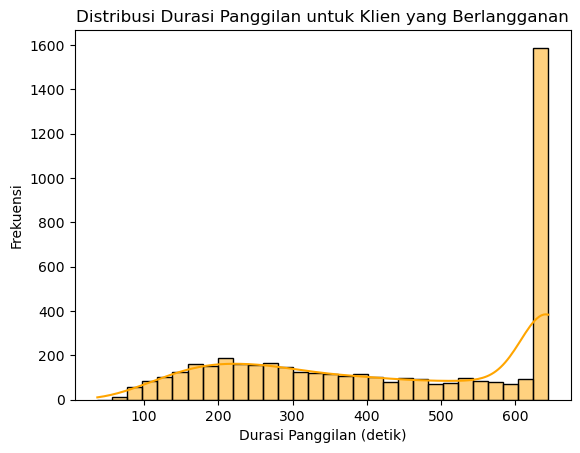

In [51]:
# Visualisasi distribusi durasi panggilan untuk pelanggan yang berlangganan
sns.histplot(data=data[data['y'] == 1], x='duration', kde=True, bins=30, color='orange')
plt.title('Distribusi Durasi Panggilan untuk Klien yang Berlangganan')
plt.xlabel('Durasi Panggilan (detik)')
plt.ylabel('Frekuensi')
plt.show()


**Klien yang berlangganan cenderung memiliki durasi panggilan lebih panjang (mayoritas di atas 300 detik).**

Tingkat Konversi Berdasarkan Hasil Kampanye Sebelumnya:
poutcome
failure        14.228598
nonexistent     8.832879
success        65.112891
Name: y, dtype: float64


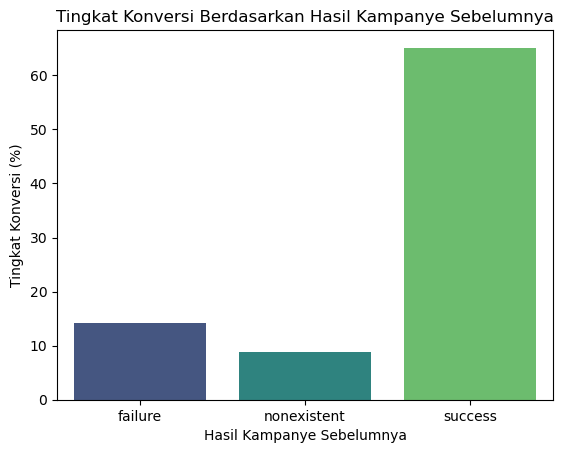

In [53]:
# Tingkat konversi berdasarkan hasil kampanye sebelumnya
conversion_by_poutcome = data.groupby('poutcome')['y'].mean() * 100
print("Tingkat Konversi Berdasarkan Hasil Kampanye Sebelumnya:")
print(conversion_by_poutcome)

# Visualisasi
sns.barplot(x=conversion_by_poutcome.index, y=conversion_by_poutcome.values, palette='viridis')
plt.title('Tingkat Konversi Berdasarkan Hasil Kampanye Sebelumnya')
plt.xlabel('Hasil Kampanye Sebelumnya')
plt.ylabel('Tingkat Konversi (%)')
plt.show()


**Klien dengan riwayat kampanye "success" memiliki tingkat konversi tertinggi, yaitu sekitar 65.11%. Sementara itu, pelanggan dengan "failure" memiliki tingkat konversi sekitar 14.23% dan "nonexistent" memiliki konversi lebih rendah, yaitu sekitar 8.83%.**

### Insight yang saya temukan
1. Kampanye memiliki tingkat konversi yang rendah, sehingga diperlukan strategi yang lebih efektif untuk meningkatkan keterlibatan dan minat pelanggan.
2. Kontak berulang cenderung tidak efektif dan dapat menyebabkan kelelahan pelanggan. Fokus pada kualitas interaksi lebih penting daripada frekuensi.
3. Durasi panggilan yang lebih lama memberikan waktu bagi pelanggan untuk memahami produk dan meningkatkan peluang konversi. Tim telemarketing perlu memastikan komunikasi yang informatif dan persuasif.
4. Fokus pada pelanggan yang belum pernah dihubungi sebelumnya (nonexistent) dapat membuka peluang baru, namun pendekatan yang lebih personal dan persuasif diperlukan untuk meningkatkan konversi.

## Re-engagement

Tahap ini berfokus pada menghidupkan kembali potensi pelanggan yang sebelumnya tidak berhasil dikonversi, khususnya mereka dengan hasil kampanye sebelumnya "failure" atau "nonexistent".

Tingkat Konversi pada Pelanggan 'Failure' dan 'Nonexistent':
poutcome
failure        14.228598
nonexistent     8.832879
Name: y, dtype: float64


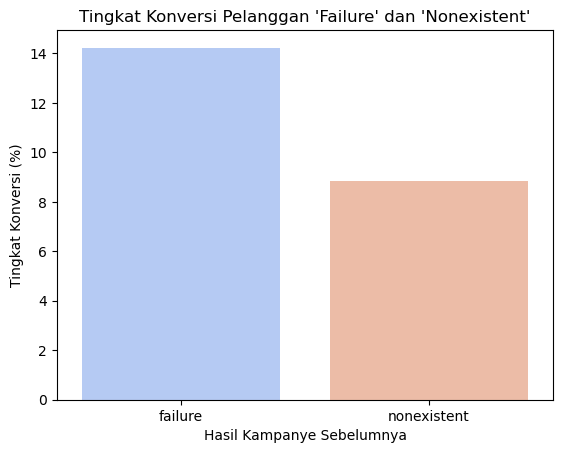

In [57]:
# Membandingkan tingkat konversi berdasarkan hasil kampanye sebelumnya (poutcome)
conversion_poutcome = data[data['poutcome'].isin(['failure', 'nonexistent'])].groupby('poutcome')['y'].mean() * 100
print("Tingkat Konversi pada Pelanggan 'Failure' dan 'Nonexistent':")
print(conversion_poutcome)

# Visualisasi
sns.barplot(x=conversion_poutcome.index, y=conversion_poutcome.values, palette='coolwarm')
plt.title("Tingkat Konversi Pelanggan 'Failure' dan 'Nonexistent'")
plt.xlabel('Hasil Kampanye Sebelumnya')
plt.ylabel('Tingkat Konversi (%)')
plt.show()


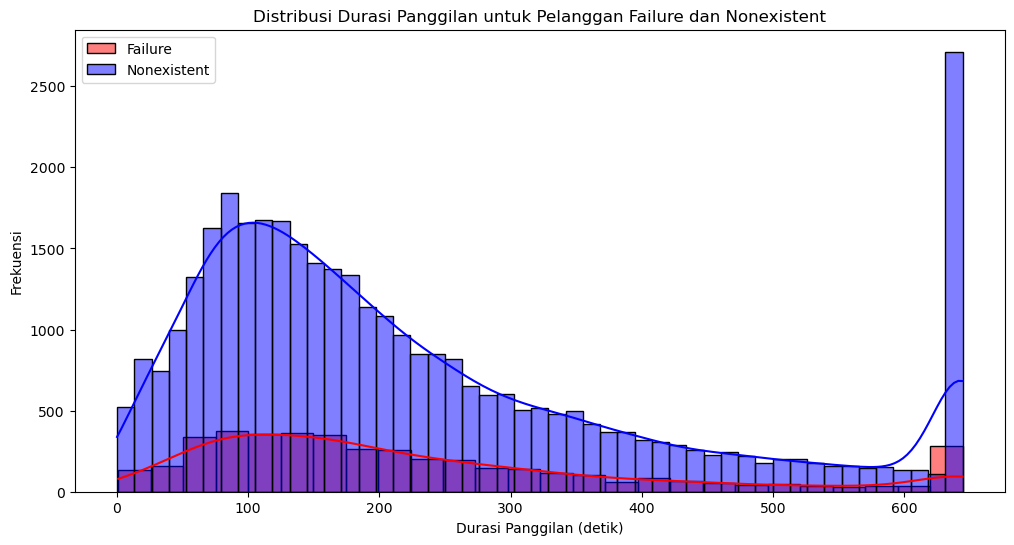

In [58]:
# Distribusi durasi panggilan untuk pelanggan "failure" dan "nonexistent"
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['poutcome'] == 'failure'], x='duration', kde=True, color='red', label='Failure')
sns.histplot(data=data[data['poutcome'] == 'nonexistent'], x='duration', kde=True, color='blue', label='Nonexistent')
plt.title('Distribusi Durasi Panggilan untuk Pelanggan Failure dan Nonexistent')
plt.xlabel('Durasi Panggilan (detik)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()


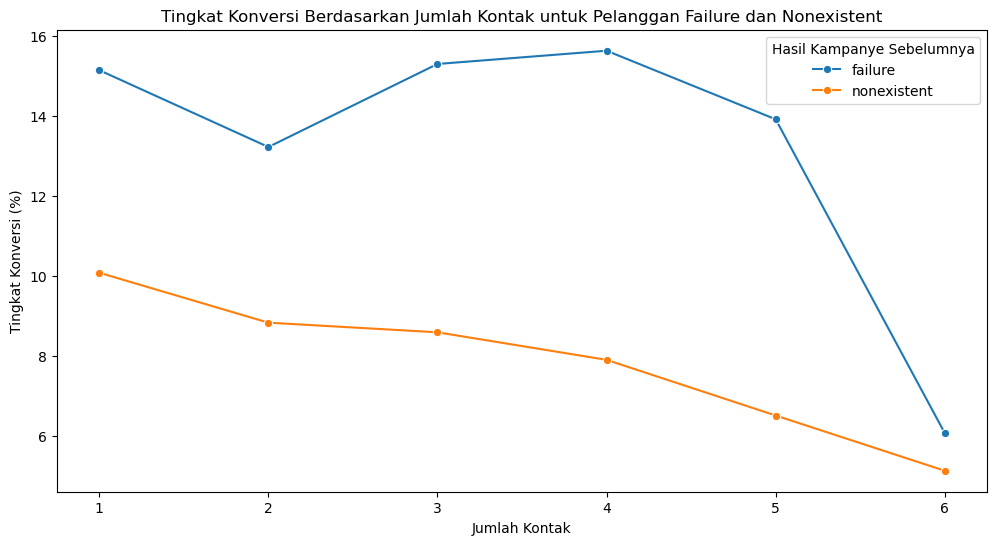

In [59]:
# Tingkat konversi berdasarkan jumlah kontak untuk pelanggan "failure" dan "nonexistent"
conversion_by_campaign = data[data['poutcome'].isin(['failure', 'nonexistent'])].groupby(['poutcome', 'campaign'])['y'].mean() * 100

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=conversion_by_campaign.reset_index(), x='campaign', y='y', hue='poutcome', marker='o')
plt.title('Tingkat Konversi Berdasarkan Jumlah Kontak untuk Pelanggan Failure dan Nonexistent')
plt.xlabel('Jumlah Kontak')
plt.ylabel('Tingkat Konversi (%)')
plt.legend(title='Hasil Kampanye Sebelumnya')
plt.show()


### Insight yang saya dapat

1. Pelanggan dengan riwayat "failure" memiliki tingkat konversi sebesar 14.2%, Sementara itu, pelanggan "nonexistent" hanya memiliki tingkat konversi 8.8%.
2. Pelanggan "nonexistent" cenderung memiliki panggilan yang lebih pendek, sehingga strategi perlu ditingkatkan.
3. Pelanggan "failure" mencapai konversi optimal setelah 3-4 kali kontak dan untuk pelanggan "nonexistent", performa konversi menurun tajam setelah kontak kedua.


# Kesimpulan dan Rekomendasi

### Temuan Utama:

1. Awareness
- Segmen student dan retired memiliki tingkat konversi tertinggi berdasarkan pekerjaan, masing-masing 31.4% dan 25.3%.
- Dari segi pendidikan, tingkat konversi tertinggi ditemukan pada segmen illiterate (22.2%) dan university.degree (13.8%).
- Status pernikahan: Pelanggan single memiliki peluang konversi lebih tinggi (14%) dibandingkan dengan married atau divorced.

2. Interest:
- Pelanggan dengan hasil kampanye sebelumnya berupa "success" memiliki tingkat konversi yang jauh lebih tinggi (65.1%).
- Pelanggan nonexistent menunjukkan peluang yang belum tergarap secara optimal.

3. Desire:
- Durasi panggilan memainkan peran penting. Pelanggan yang berhasil berlangganan memiliki durasi panggilan lebih panjang (300-600 detik).
- Faktor kombinasi pekerjaan dan pendidikan juga mengungkap segmen prioritas, seperti student dengan pendidikan basic.6y.
  
4. Action:
- Jumlah kontak yang optimal adalah 1-3 kali. Setelah itu, tingkat konversi cenderung menurun drastis.
- Distribusi target menunjukkan ketimpangan signifikan, dengan hanya 11.3% pelanggan yang berhasil berlangganan.
  
5. Re-engagement:
- Pelanggan "nonexistent" memiliki peluang konversi yang lebih rendah (8.8%) dibandingkan pelanggan "failure" (14.2%).
- Upaya re-engagement dapat ditingkatkan dengan komunikasi lebih personal dan durasi panggilan optimal.

### Rekomendasi Akhir

1. Target Segmen Prioritas
- Fokuskan kampanye pada segmen student, retired, dan pelanggan dengan university degree.
- Prioritaskan pelanggan yang memiliki hasil kampanye sebelumnya "nonexistent" untuk memperluas basis pelanggan.

2. Optimalisasi Durasi Panggilan
- Upayakan durasi panggilan di rentang 300-600 detik untuk meningkatkan konversi.

3. Frekuensi Kontak:
- Hindari kontak yang berlebihan, terutama untuk pelanggan "nonexistent". Batasi hingga 2-3 kali kontak.
- Untuk pelanggan "failure", pertahankan frekuensi 3-4 kali kontak sebagai strategi optimal.

4. Konten dan Pendekatan Personal
- Sesuaikan konten panggilan berdasarkan segmen pekerjaan dan pendidikan pelanggan.
- Gunakan data kampanye sebelumnya untuk menciptakan pendekatan yang lebih personal.